In [4]:
# Abhinav Vatsa

Moment of Inertia Tensor:
 [[122. -33. -42.]
 [-33. 100. -59.]
 [-42. -59.  70.]]
Axis Ratios (b/a, c/a): 0.997877668116669 0.0651165069244291
The halo is oblate (flattened).


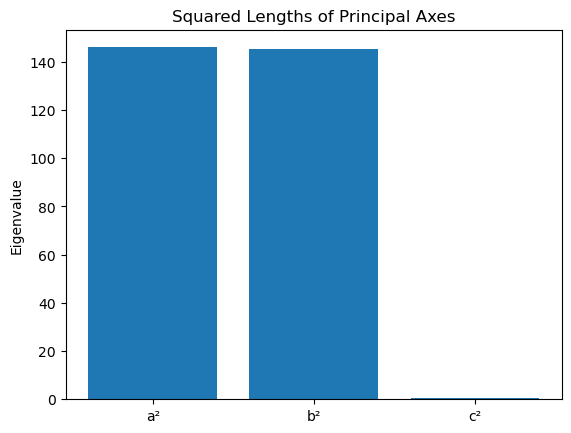

In [6]:
# Research Assignment 3
# Project: Determining the Shape of a Dark Matter Halo
# Goal: Compute the moment of inertia tensor and determine whether the halo is 
#       triaxial, oblate, or prolate based on axis ratios.

# Importing packages
import numpy as np
import matplotlib.pyplot as plt

# Placeholder made-up data for particle positions and masses
positions = np.array([
    [1.0, 2.0, 3.0],
    [2.0, 3.0, 4.0],
    [3.0, 4.0, 5.0],
    [4.0, 5.0, 6.0]
])
masses = np.array([1.0, 1.5, 1.0, 0.5])

# Using the COM function from previous homeworks, the center of mass will be computed and the positions will be centered.

def compute_inertia_tensor(positions, masses):
    """
    Calculates the moment of inertia tensor for a set of particles.
    The formula used is: I_ij = sum_k [ m_k (r_k^2 * delta_ij - x_k,i * x_k,j) ]
    Where m_k is the mass of particle k, and x_k,i and x_k,j are the coordinates.
    """
    # Calculate the squared distances of each particle from the origin
    r_squared = np.sum(positions ** 2, axis=1)
    
    # Initialize the inertia tensor as a 3x3 matrix
    inertia = np.zeros((3, 3))

    # Loop through each pair of axes (i, j)
    for i in range(3):
        for j in range(3):
            # Calculate the diagonal and off-diagonal terms of the inertia tensor
            if i == j:
                inertia[i, j] = np.sum(masses * (r_squared - positions[:, i] * positions[:, j]))
            else:
                inertia[i, j] = -np.sum(masses * positions[:, i] * positions[:, j])

    return inertia

def axis_ratios(I):
    """ Compute eigenvalues and determine axis ratios b/a and c/a. """
    eigenvalues, _ = np.linalg.eig(I)
    eigenvalues = np.sort(eigenvalues)[::-1]  # Sorting in descending order to get a^2, b^2, c^2 in order
    if eigenvalues[0] == 0:
        return None, None
    return np.sqrt(eigenvalues[1] / eigenvalues[0]), np.sqrt(eigenvalues[2] / eigenvalues[0])

# Compute the inertia tensor and axis ratios
I = compute_inertia_tensor(positions, masses)
ba, ca = axis_ratios(I)

# Print results
print("Moment of Inertia Tensor:\n", I)
print("Axis Ratios (b/a, c/a):", ba, ca)

# Determine the shape based on axis ratios
if ba == 1 and ca == 1:
    print("The halo is spherical.")
elif ba < 1 and ca < 1:
    print("The halo is oblate (flattened).")
elif ba > 1 and ca > 1:
    print("The halo is prolate (elongated).")
else:
    print("The halo is triaxial (neither oblate nor prolate).")

# Visualization of the results
plt.bar(['a²', 'b²', 'c²'], np.sort(np.linalg.eigvals(I))[::-1])
plt.title("Squared Lengths of Principal Axes")
plt.ylabel("Eigenvalue")
plt.show()
